# Example of use of the model by Mares-Nasarre (2025)

Please, when using the model, refer to the corresponding publication: Mares-Nasarre (2025). Probabilistic estimation of the mean wave overtopping discharge on mound breakwaters. Coastal Engineering, https://doi.org/10.1016/j.coastaleng.2025.104792

### Loading packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_banshee.rankcorr import bn_rankcorr
from py_banshee.prediction import inference

plt.rcParams.update({'font.size': 14})

/Users/pmaresnasarre/opt/anaconda3/envs/multi_more/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
#Data to quantify the BN
df_training = pd.read_csv('training.csv', delimiter = ',', index_col=0).dropna()

#subset of needed variables
select = [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 13]
df_training = df_training.iloc[:, select]

#rename columns (formatting)
names = ['Q', 'm', '${\\beta}$', '${\\gamma_f}$', '${R_c/H_{m0}}$', '${s_{-1,0}}$', '${G_c/H_{m0}}$', '${A_c/H_{m0}}$', '${B_t/H_{m0}}$', '${h/H_{m0}}$', '${cot\\alpha}$']
df_training.columns = names

### Defining the model

In [4]:
#Define the network: based on training

names = list(df_training.columns)
print(names)

N = df_training.shape[1] # number of nodes
parents1 = [None]*N  # create an empty list 

parents1[0] = [2, 3, 4, 6, 7, 8]         
parents1[1] = [9]    
parents1[2] = [1, 8, 10]  
parents1[3] = [10, 6]  
parents1[4] = [5, 7]  
parents1[5] = [9, 10]  
parents1[6] = [10, 7]  
parents1[7] = [5]  
parents1[8] = [3, 6, 10]  
parents1[9] = [] 
parents1[10] = [9] 

#Compute the rank correlation matrix that defines the BN
R_BN_1=bn_rankcorr(parents1,df_training,var_names=names,is_data=True, plot=False)

['Q', 'm', '${\\beta}$', '${\\gamma_f}$', '${R_c/H_{m0}}$', '${s_{-1,0}}$', '${G_c/H_{m0}}$', '${A_c/H_{m0}}$', '${B_t/H_{m0}}$', '${h/H_{m0}}$', '${cot\\alpha}$']


### Using the model

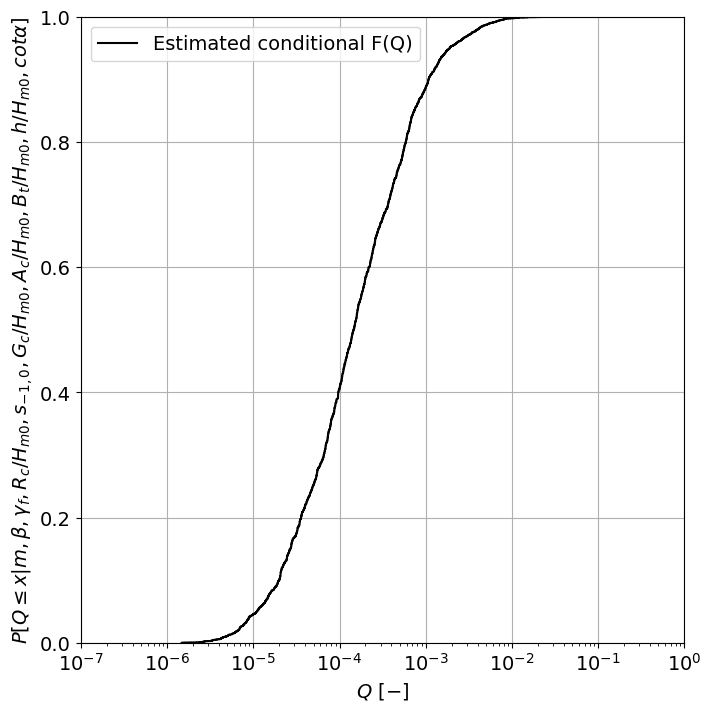

In [6]:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n+1)
    return [y, x]

#Conditionalizing
example_design = [50, 25, 0.49, 1.4, 0.032, 0.4, 1, 0.4, 1.5, 2.5] #values of the explanatory variables
condition_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #explanatory variables from which I know the value

#Conditional samples
Q_example =inference(Nodes = condition_nodes,
            Values = example_design,
            R=R_BN_1,
            DATA=df_training,
            empirical_data=True, 
            SampleSize=10000,
            Output='full').squeeze()

#Plotting the obtained distribution
fig, axes = plt.subplots(1,1, figsize=(7,7), layout='constrained')

min=0.0000001
max=1

axes.step(ecdf(Q_example)[1], ecdf(Q_example)[0], 'k', label = 'Estimated conditional F(Q)')
axes.grid()
axes.set_xscale('log')
axes.set_xlim([min, max])
axes.set_ylim([0, 1])
axes.set_xlabel('${Q \ [-]}$')
axes.set_ylabel('${P[Q \\leq x|m, \\beta, \\gamma_f, R_c/H_{m0}, s_{-1,0}, G_c/H_{m0}, A_c/H_{m0}, B_t/H_{m0}, h/H_{m0}, cot\\alpha]}$')
axes.legend()

End of the notebook.